<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/auto_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [3]:
gold_df=yf.download(tickers='GC=F',interval='1d')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
gold_df.to_csv('gold_df.csv')

In [6]:
from my_func_pkg import exp_change

In [7]:
closes=gold_df['Close'].values[:,0]

In [8]:
ret_g=exp_change(closes)

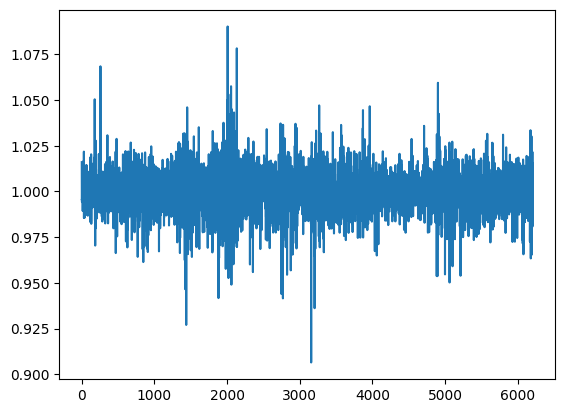

In [9]:
plt.plot(ret_g)

In [10]:
def build_data_for_auto_NN(inp_data,len_x:int,len_y:int):
  ln=len(inp_data)
  x=[]
  y=[]
  for i in range(ln):
    if i+len_x<ln and i+len_x+len_y<ln:
      x.append(inp_data[i:i+len_x])
      y.append(inp_data[i+len_x:i+len_x+len_y])
  return np.array(x),np.array(y)


In [11]:
x,y=build_data_for_auto_NN(ret_g,1000,30)

In [12]:
x.shape

(5178, 1000)

In [13]:
y.shape

(5178, 30)

In [14]:
x.reshape(x.shape[0],x.shape[1],1).shape

(5178, 1000, 1)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

In [16]:
model = models.Sequential([
    layers.LSTM(100, input_shape=(1000,1)),
    layers.Dense(60),
    layers.Dense(30)  # خروجی با همان ابعاد ورودی
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
model.fit(x_train, y_train, epochs=16, batch_size=129)

Epoch 1/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.4674
Epoch 2/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0037
Epoch 3/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 2.2911e-04
Epoch 4/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.2633e-04
Epoch 5/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.2219e-04
Epoch 6/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.2671e-04
Epoch 7/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.2535e-04
Epoch 8/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.2708e-04
Epoch 9/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.2746e-04
Epoch 10/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.2631e-04
Epoch 11/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.2535e-04
Epoch 12/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.2587e-04
Epoch 13/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.2716e-04
Epoch 14/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 1.2371e-04
Epoch 15/16
33/33 ━━━━━

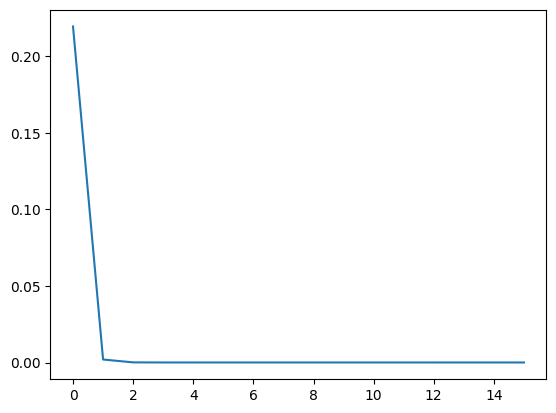

In [21]:
plt.plot(model.history.history['loss'])

In [25]:
model.save('my_gold_NN_model.keras')

In [26]:
model.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.2732e-04


0.00012718448124360293

In [28]:
y_predict=model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


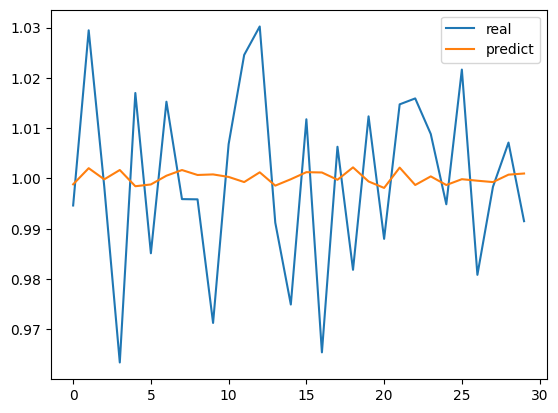

In [33]:
plt.plot(ret_g[-30:])
plt.plot(y_predict[-1])
plt.legend(['real','predict'])

In [34]:
np.mean(y_predict[-1])

np.float32(1.0001596)

In [35]:
y_p_all=model.predict(x)

162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [36]:
y_p_all.shape

(5178, 30)